# Random Forest Clustering
fdsa

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [13]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


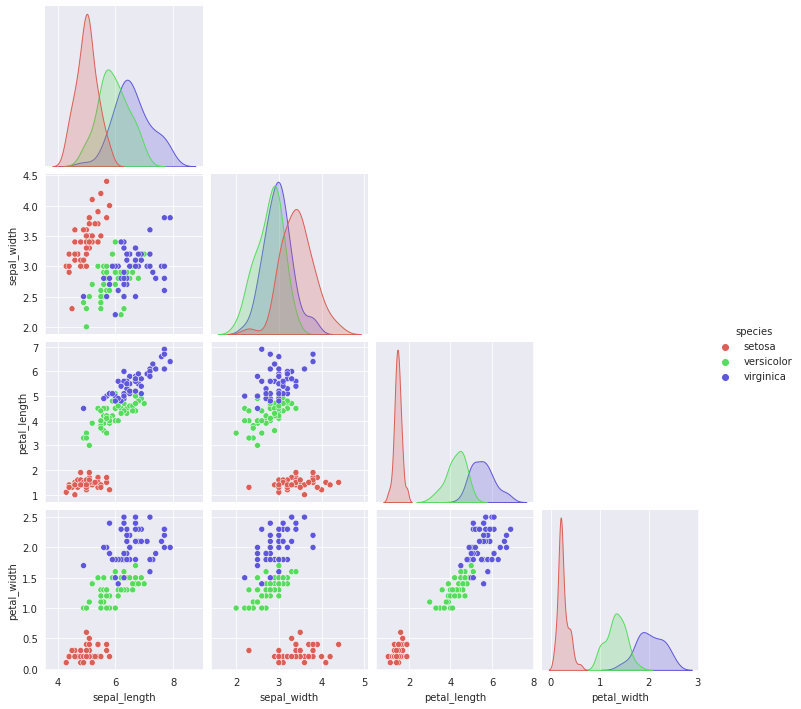

In [14]:
palette = sns.color_palette("hls", 3)
sns.pairplot(iris, hue='species', palette=palette, corner=True)

In [15]:
X = iris.drop('species', axis=1)
enc = LabelEncoder().fit(iris.species)
y = enc.transform(iris.species)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
rf.score(X_test, y_test)

1.0

In [16]:
for name, importance in zip(rf.feature_names_in_, rf.feature_importances_):
    print("{} importance: {:.2%} ".format(name, importance))

sepal_length importance: 10.41% 
sepal_width importance: 4.46% 
petal_length importance: 41.73% 
petal_width importance: 43.40% 


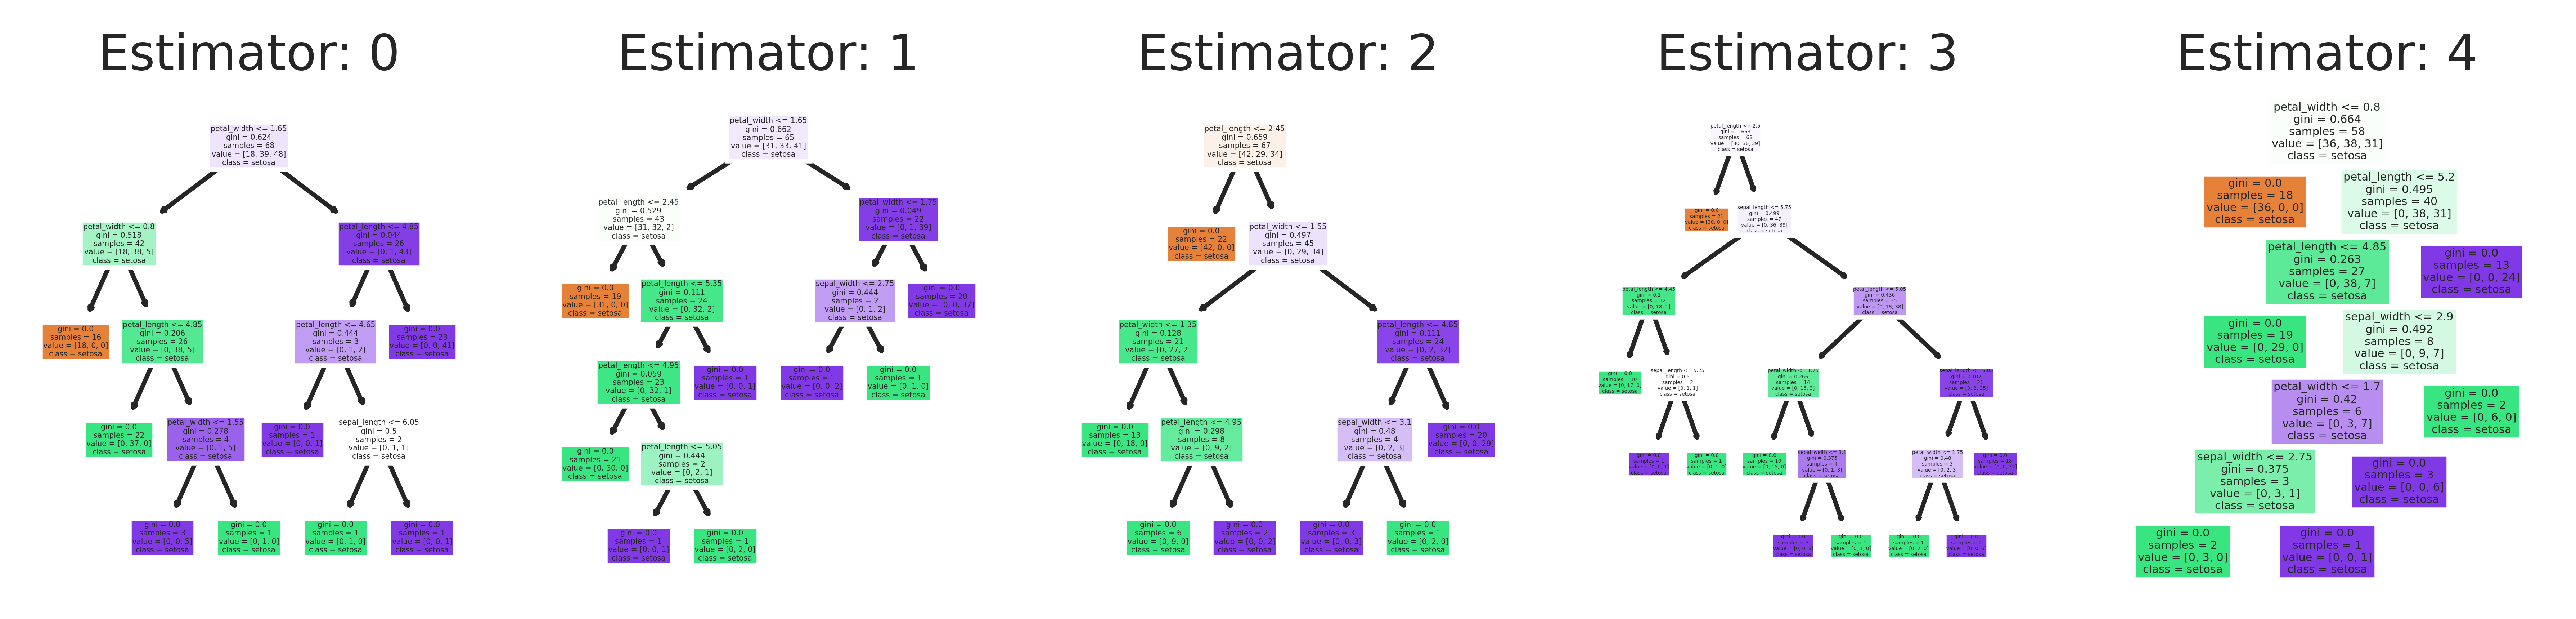

In [17]:
# This may not the best way to view each estimator as it is small
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = rf.feature_names_in_,
                   class_names=iris.species,
                   filled = True,
                   ax = axes[index])

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
# fig.savefig('rf_5trees.png')

In [18]:
close_data = pd.DataFrame(data={ 'sepal_length': [4.95], 'sepal_width': [3.0], 'petal_length': [1.4], 'petal_width': [0.2], 'species': ['setosa'] })

In [19]:
X_valid = close_data.drop('species', axis=1)

enc.inverse_transform(rf.predict(X_valid))

from scipy.spatial import distance

X_leaves = rf.decision_path(X)[0].toarray()
valid_leaves = rf.decision_path(X_valid)[0].toarray()
distances = [distance.euclidean(valid_leaves, l) for l in X_leaves]
np.argmin(distances)

1